Knapsack Optimization Project

Description:
This project implements two solutions to the classic Knapsack Problem. 
Our goal was to maximize value while adhering to weight restrictions. In our 
approach, we used a dynamic programming solution and a greedy algorithm.
My team and I worked on this project at the end of our second semester (Spring 2025).


In [20]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def dynamic_knapsack(capacity, weights, values):
    #capacity: how much weight  knapsack  can carry / weights: a list of the weights of the items / values: a list of how valuable each item is
    n = len(values)
    #n is the number of items we have based on how long the values list is
    dp_table = [[0] * (capacity + 1) for _ in range(n + 1)]
    #this creates a  table, it has (n + 1) rows and (capacity + 1) columns, every cell is filled with 0 at the beginning, table helps us store results

    for i in range(n + 1):
        for w in range(capacity + 1):
#first loop goes through each item (including 0 for nothing) / second loop checks each possible bag weight from 0 up to the full capacity
            if i == 0 or w == 0:
                dp_table[i][w] = 0
#if we’re dealing with 0 items or the bag’s capacity is 0 then the value is 0
            elif weights[i - 1] <= w:
#if the current item can fit in the bag (its weight is less than or equal to the current capacity w)
                dp_table[i][w] = max(values[i - 1] + dp_table[i - 1][w - weights[i - 1]], dp_table[i - 1][w])
#include the item: take its value + what we could carry with remaining capacity (w - weight) OR don't include the item: Just take whatever value we got without it.
#max(...) picks the better choice 
            else:
                dp_table[i][w] = dp_table[i - 1][w]
#if the item’s too heavy for our current bag size, we just skip it and copy the value from before

    max_value = dp_table[n][capacity]
#the best possible value we can carry is found in the bottom right of the table, then we’re gonna figure out which items we chose
    selected_items = [] #will hold their indexes
    w = capacity #keeps track of remaining weight capacity
    for i in range(n, 0, -1):
        if dp_table[i][w] != dp_table[i - 1][w]:
            selected_items.append(i - 1)
            w -= weights[i - 1]
#we go backwards through the table to trace which items were picked, if the value changed from the previous row, it means we included that item
#we subtract its weight from our remaining capacity.
    selected_items.reverse()
    return max_value, selected_items
#we reverse the list so the item order is correct.
#it return two things: 1)the maximum value we can carry 2)the list of chosen item indexes


In [22]:
def greedy_knapsack(capacity, weights, values):
    n = len(values)
    value_per_weight = [(values[i] / weights[i], i) for i in range(n)]
#this makes a list of value to weight ratio, item index -- it shows how valuable each item is per for example kilogram(?)
    value_per_weight.sort(reverse=True)
#we sort the items from most valuable per kg to least

    total_value = 0 #how much value we've packed so far
    selected_items = [] #list of what we've taken
    remaining_capacity = capacity #how much space we got left in the bag

    for ratio, index in value_per_weight:
        if weights[index] <= remaining_capacity:
            selected_items.append(index)
            total_value += values[index]
            remaining_capacity -= weights[index]
#we go through the sorted items, if an item fits in the bag we take it, add its value, and subtract its weight from our bag's space

    return total_value, selected_items
#return the total value and which items were picked

In [28]:
def test_function(number_of_test_runs, Knapsack_Function):
    '''This function is for teckpack.sting the two solutions for the
      0/1 knapsack problem, it will generate random treasures with random
      values and weights, and will call the functions to try and 
      fit the treasures into a randomly sized backpack
      it takes the number of test runs and the function we want to test as input'''
    times = []
    
    for i in range(number_of_test_runs):
        weights = []
        values = []
        n = random.randint(1000,2500) #number of treasures
        v1 = int(n * 0.9)
        v2 = int(n * 2)
        w1 = int(n *0.8)
        w2 = int(n * 1.2)
        s1 = int(n * 0.8 *8)
        s2 = int(n * 1.2 * 8)
        for j in range(n):
            weights.append(int(random.randint(w1, w2)))
            values.append(int(random.randint(v1, v2)))
        capacity = int(random.randint(s1, s2))
    
        start_time = time.time()
        knapsack_solution =  Knapsack_Function(capacity, weights, values)
        end_time = time.time()

    
        running_time = end_time - start_time
        times.append(round(running_time, 5))
    return  times

Running test case 1...
  DP: Value = 211, Time = 0.0002 seconds, Items = [0, 1, 2, 3, 4, 7]
  Ratio: Value = 211, Time = 0.0000 seconds, Items = [0, 4, 1, 2, 7, 3]

Sample Solution: Dynamic Programming
                Method  Item Index  Value  Weight
0  Dynamic Programming           0     42       1
1  Dynamic Programming           1     48      16
2  Dynamic Programming           2     40      14
3  Dynamic Programming           3     45      25
4  Dynamic Programming           4     12       2
5  Dynamic Programming           7     24      10

Sample Solution: Greedy Algorithm
             Method  Item Index  Value  Weight
0  Greedy Algorithm           0     42       1
1  Greedy Algorithm           4     12       2
2  Greedy Algorithm           1     48      16
3  Greedy Algorithm           2     40      14
4  Greedy Algorithm           7     24      10
5  Greedy Algorithm           3     45      25
Running test case 2...
  DP: Value = 223, Time = 0.0003 seconds, Items = [0, 1, 2, 3

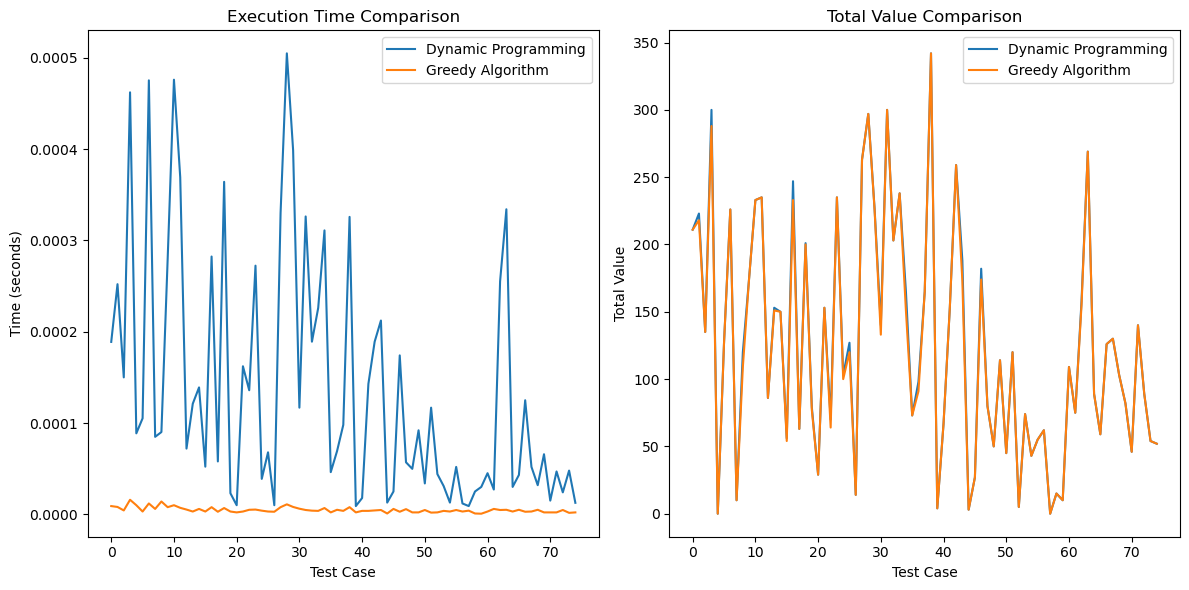

In [24]:
def generate_test_cases(num_cases, max_items, max_capacity, max_weight, max_value):
    test_cases = []
    for _ in range(num_cases):
        num_items = random.randint(1, max_items)
        capacity = random.randint(1, max_capacity)
        weights = [random.randint(1, max_weight) for _ in range(num_items)]
        values = [random.randint(1, max_value) for _ in range(num_items)]
        test_cases.append((capacity, weights, values))
    return test_cases

def test_algorithms(test_cases):
    dp_times = []
    ratio_times = []
    dp_values = []
    ratio_values = []
    best_dp_case = {'value': -1, 'case_index': -1, 'capacity': 0, 'weights': [], 'values': [], 'items': []}
    best_ratio_case = {'value': -1, 'case_index': -1, 'capacity': 0, 'weights': [], 'values': [], 'items': []}

    for i, (capacity, weights, values) in enumerate(test_cases):
        print(f"Running test case {i + 1}...")

        start_time = time.time()
        dp_value, dp_items = dynamic_knapsack(capacity, weights, values)
        end_time = time.time()
        dp_time = end_time - start_time
        dp_times.append(dp_time)
        dp_values.append(dp_value)
        print(f"  DP: Value = {dp_value}, Time = {dp_time:.4f} seconds, Items = {dp_items}")

        start_time = time.time()
        ratio_value, ratio_items = greedy_knapsack(capacity, weights, values)
        end_time = time.time()
        ratio_time = end_time - start_time
        ratio_times.append(ratio_time)
        ratio_values.append(ratio_value)
        print(f"  Ratio: Value = {ratio_value}, Time = {ratio_time:.4f} seconds, Items = {ratio_items}")

# Track best case backpack for DP
        if dp_value > best_dp_case['value']:
            best_dp_case = {
                'value': dp_value,
                'case_index': i + 1,
                'capacity': capacity,
                'weights': weights.copy(),
                'values': values.copy(),
                'items': dp_items
            }

# Track best case backpack for Greedy
        if ratio_value > best_ratio_case['value']:
            best_ratio_case = {
                'value': ratio_value,
                'case_index': i + 1,
                'capacity': capacity,
                'weights': weights.copy(),
                'values': values.copy(),
                'items': ratio_items
            }

# print sample solution only for the first test case
        if i == 0:
            dp_data = {
                "Method": ["Dynamic Programming"] * len(dp_items),
                "Item Index": dp_items,
                "Value": [values[i] for i in dp_items],
                "Weight": [weights[i] for i in dp_items]
            }
            ratio_data = {
                "Method": ["Greedy Algorithm"] * len(ratio_items),
                "Item Index": ratio_items,
                "Value": [values[i] for i in ratio_items],
                "Weight": [weights[i] for i in ratio_items]
            }

            dp_df = pd.DataFrame(dp_data)
            ratio_df = pd.DataFrame(ratio_data)

            print("\nSample Solution: Dynamic Programming")
            print(dp_df)

            print("\nSample Solution: Greedy Algorithm")
            print(ratio_df)

    return dp_times, ratio_times, dp_values, ratio_values, best_dp_case, best_ratio_case

def analyze_results(dp_times, ratio_times, dp_values, ratio_values, best_dp_case, best_ratio_case):
    num_cases = len(dp_times)

    print("\n--- Performance Analysis ---")
    print(f"Number of Test Cases: {num_cases}")

    print("\nDynamic Programming:")
    print(f"  Average Time: {np.mean(dp_times):.4f} seconds")
    print(f"  Best Time: {min(dp_times):.4f} seconds")
    print(f"  Worst Time: {max(dp_times):.4f} seconds")
    print(f"  Average Value: {np.mean(dp_values):.2f}")
    print(f"  Best Value: {max(dp_values):.2f}")
    print(f"  Worst Value: {min(dp_values):.2f}")

    print("\nGreedy Algorithm:")
    print(f"  Average Time: {np.mean(ratio_times):.4f} seconds")
    print(f"  Best Time: {min(ratio_times):.4f} seconds")
    print(f"  Worst Time: {max(ratio_times):.4f} seconds")
    print(f"  Average Value: {np.mean(ratio_values):.2f}")
    print(f"  Best Value: {max(ratio_values):.2f}")
    print(f"  Worst Value: {min(ratio_values):.2f}")

    # Print best-case backpack details
    print("\n--- Best-Case Backpack (Highest Total Value) ---")
    print("\nDynamic Programming Best Case:")
    print(f"  Test Case: {best_dp_case['case_index']}")
    print(f"  Total Value: {best_dp_case['value']}")
    print(f"  Capacity: {best_dp_case['capacity']}")
    print(f"  Selected Items (Index, Value, Weight):")
    for idx in best_dp_case['items']:
        print(f"    Item {idx}: Value = {best_dp_case['values'][idx]}, Weight = {best_dp_case['weights'][idx]}")
    print(f"  Total Weight: {sum(best_dp_case['weights'][idx] for idx in best_dp_case['items'])}")

    print("\nGreedy Algorithm Best Case:")
    print(f"  Test Case: {best_ratio_case['case_index']}")
    print(f"  Total Value: {best_ratio_case['value']}")
    print(f"  Capacity: {best_ratio_case['capacity']}")
    print(f"  Selected Items (Index, Value, Weight):")
    for idx in best_ratio_case['items']:
        print(f"    Item {idx}: Value = {best_ratio_case['values'][idx]}, Weight = {best_ratio_case['weights'][idx]}")
    print(f"  Total Weight: {sum(best_ratio_case['weights'][idx] for idx in best_ratio_case['items'])}")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(dp_times, label="Dynamic Programming")
    plt.plot(ratio_times, label="Greedy Algorithm")
    plt.xlabel("Test Case")
    plt.ylabel("Time (seconds)")
    plt.title("Execution Time Comparison")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(dp_values, label="Dynamic Programming")
    plt.plot(ratio_values, label="Greedy Algorithm")
    plt.xlabel("Test Case")
    plt.ylabel("Total Value")
    plt.title("Total Value Comparison")
    plt.legend()

    plt.tight_layout()
    plt.show()

class KnapsackRunner:
    def __init__(self):
        self.num_cases = random.randint(1, 100)
        self.max_items = 20
        self.max_capacity = 100
        self.max_weight = 30
        self.max_value = 50

    def run(self):
        test_cases = generate_test_cases(
            self.num_cases, self.max_items, self.max_capacity,
            self.max_weight, self.max_value)
        dp_times, ratio_times, dp_values, ratio_values, best_dp_case, best_ratio_case = test_algorithms(test_cases)
        analyze_results(dp_times, ratio_times, dp_values, ratio_values, best_dp_case, best_ratio_case)

KnapsackRunner().run()
